In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import TPI

## B-spline basis functions

Plot the nth non-uniform B-spline basis function of degree 3 with knots x1

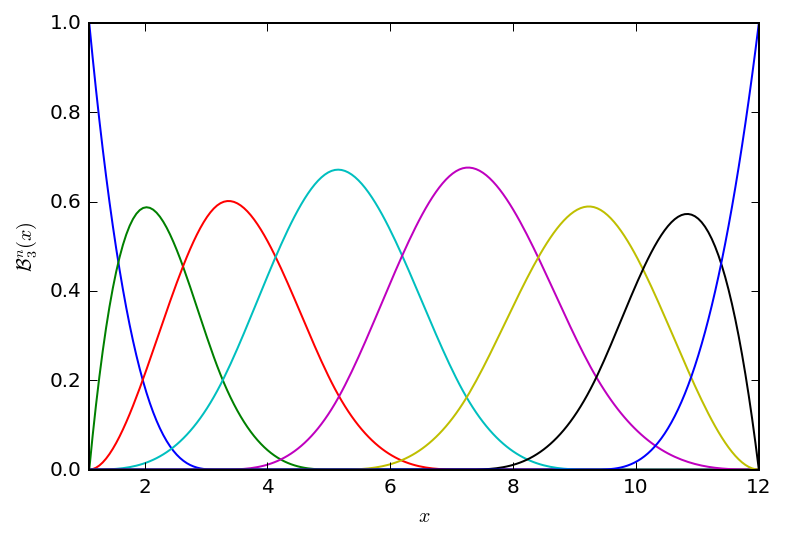

In [2]:
x1 = np.array([1.1, 3.2, 5.1, 7.2, 9.3, 12])
b = TPI.BsplineBasis1D(x1)

x = np.linspace(x1[0], x1[-1], 200)
Bspl = np.array(map(b.EvaluateBsplines, x))

for i in range(len(Bspl.T)):
    plt.plot(x, Bspl.T[i], label=i)
plt.xlim([x1[0], x1[-1]]);
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathcal{B}_3^n(x)$');

## Knots and spline matrix with "not-a-knot" boundary conditions

In [3]:
x1 = np.array([1.1, 3.2, 5.1, 7.2, 9.3, 12])
b = TPI.BsplineBasis1D(x1)
b_phi, b_knots = b.AssembleSplineMatrix()

b_knots

array([  1.1,   1.1,   1.1,   1.1,   3.2,   5.1,   7.2,   9.3,  12. ,
        12. ,  12. ,  12. ])

The spline matrix is not tridiagonal near the boundaries due to the "not-a-knot" boundary conditions.

In [4]:
pd.DataFrame(b_phi)

,0,1,2,3,4,5,6,7
0,-0.647878,1.363954,-1.092016,0.505362,-0.129422,0.000000,0.000000,0.000000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.225625,0.593637,0.180738,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.180738,0.671311,0.147951,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.172131,0.675695,0.152174,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.220109,0.588485,0.191406,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
7,0.000000,0.000000,0.000000,-0.111520,0.363473,-0.643879,0.696758,-0.304832


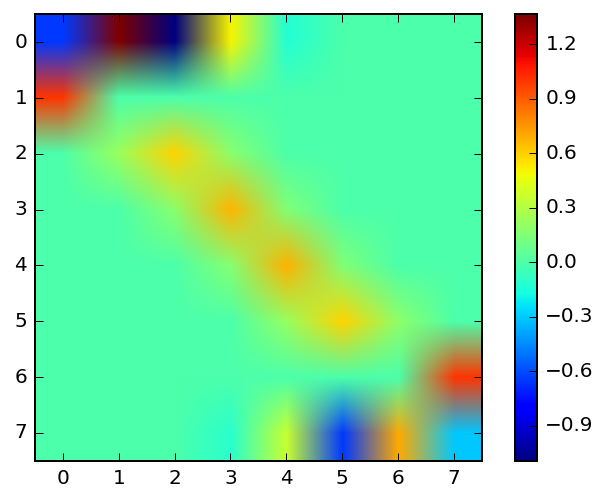

In [5]:
plt.imshow(b_phi);
plt.colorbar();

## 1D spline interpolation

In [6]:
xi = np.array([0.1, 0.11, 0.12, 0.15, 0.2, 0.23, 0.24, 0.248, 0.249, 0.25])
X = [xi]

def f(x):
    return np.cos(40*x)

fI = TPI.TP_Interpolant_ND(X, F=f(xi))
fIv = np.vectorize(fI)

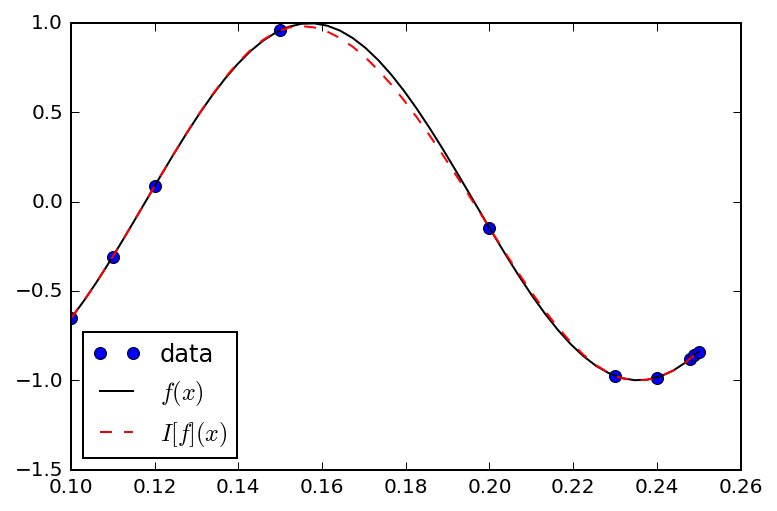

In [7]:
x = np.linspace(xi[0], xi[-1])
plt.plot(xi, f(xi), 'o', label='data')
plt.plot(x, f(x), 'k-', label=r'$f(x)$')
plt.plot(x, fIv(x), 'r--', label=r'$I[f](x)$')
plt.legend(loc=3);

## 2D TP spline interpolation

In [8]:
xi = np.array([0.1, 0.11, 0.12, 0.15, 0.2, 0.23, 0.24, 0.248, 0.249, 0.25])
yi = np.array([-1, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 1.0])
X = [xi, yi]

def f(x,y):
    return np.sin(x) * np.arccos(y)

xx, yy = np.meshgrid(xi, yi, indexing='ij')
F = f(xx, yy)

fI = TPI.TP_Interpolant_ND(X, F=F)

Evaluate the interpolant at a point within the 2D regular grid formed by the Cartesian product of `xi` and `yi`:

In [9]:
fI([0.134, -0.28])

0.24767973306052374

Evaluate the interpolant and the original function on a finer grid:

In [10]:
XX, YY = np.meshgrid(np.linspace(xi[0], xi[-1], 50), np.linspace(yi[0], yi[-1], 50), indexing='ij')
FF = f(XX, YY)
ZZ = np.array([fI([XX[i][j], YY[i][j]]) 
               for i in np.arange(XX.shape[0]) 
               for j in np.arange(XX.shape[1])]
             ).reshape(XX.shape)

Plot the function, interpolant and errors.

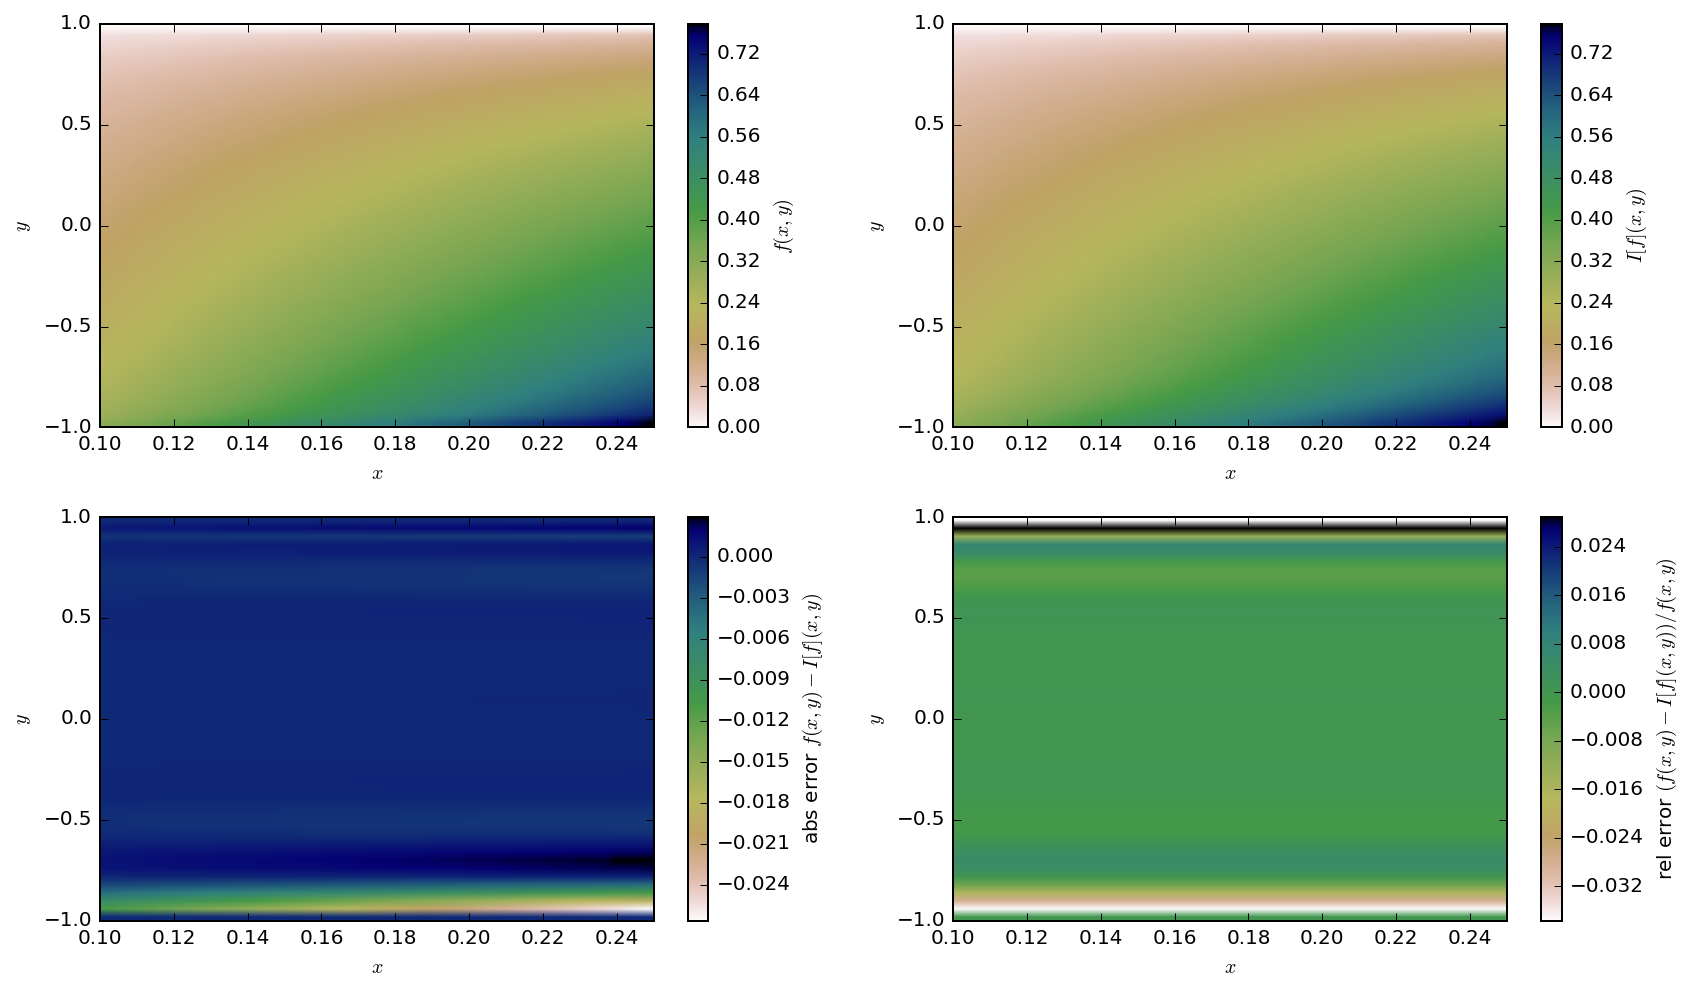

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 7))
im = ax1.imshow(np.rot90(FF), cmap=plt.cm.gist_earth_r,
           extent=[xi[0], xi[-1], yi[0], yi[-1]], aspect='auto')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
plt.colorbar(im, ax=ax1, label='$f(x,y)$');

im = ax2.imshow(np.rot90(ZZ), cmap=plt.cm.gist_earth_r,
           extent=[xi[0], xi[-1], yi[0], yi[-1]], aspect='auto')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
plt.colorbar(im, ax=ax2, label='$I[f](x,y)$');

im = ax3.imshow(np.rot90(FF - ZZ), cmap=plt.cm.gist_earth_r,
           extent=[xi[0], xi[-1], yi[0], yi[-1]], aspect='auto')
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$y$')
plt.colorbar(im, ax=ax3, label='abs error $f(x,y) - I[f](x,y)$');

im = ax4.imshow(np.rot90((FF - ZZ)/FF), cmap=plt.cm.gist_earth_r,
           extent=[xi[0], xi[-1], yi[0], yi[-1]], aspect='auto')
ax4.set_xlabel(r'$x$')
ax4.set_ylabel(r'$y$')
plt.colorbar(im, ax=ax4, label='rel error $(f(x,y) - I[f](x,y)) / f(x,y)$');

plt.tight_layout()

## 4D TP spline interpolation

In [12]:
x1 = np.array([0.1, 0.11, 0.12, 0.15, 0.2, 0.23, 0.24, 0.248, 0.249, 0.25])
x2 = np.array([-1, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 1.0])
x3 = np.array([-1, -0.8, -0.6, -0.4, 0.0, 0.2, 0.4, 0.8, 1.0])
x4 = np.array([-0.8, -0.6, -0.4, 0.0, 0.5, 1.0, 1.5])
X = [x1, x2, x3, x4]

def f(x1,x2,x3,x4):
    return np.sin(x1) * np.arccos(x2) * np.exp(x3) * np.cos(x4)

xx1, xx2, xx3, xx4 = np.meshgrid(x1, x2, x3, x4, indexing='ij')
F = f(xx1, xx2, xx3, xx4)

fI = TPI.TP_Interpolant_ND(X, F=F)

While the code works for arbitrary dimensions, but it may be difficult to get good accuracy for reasonably sized grids when the number of dimensions is high.

In [13]:
y = (0.238, -0.97, 0.93, -0.251)
f(*y), fI(y)

(1.6762510084360815, 1.7406203705198744)

For this example the relative error is already ~ 4%.

In [14]:
(f(*y) - fI(y)) / f(*y)

-0.038400789475944032